In [56]:
#import useful libraries
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

# Used for normalization: z-standardization
from sklearn.preprocessing import StandardScaler

In [57]:
data_frame = pd.read_csv("winequality-white.csv", delimiter=';') #'delimeter' is used to fix the outpu
print(data_frame.head(3))

#calculate some statistical data like mean
print("\nStatistical data\n")
print(data_frame.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  

Statistical data

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   

In [58]:
#get more info
print(data_frame.info())
print("\n type of quality:\n")
print(data_frame['quality'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

 type of quality:

[6 5 7 8 4 3 9]


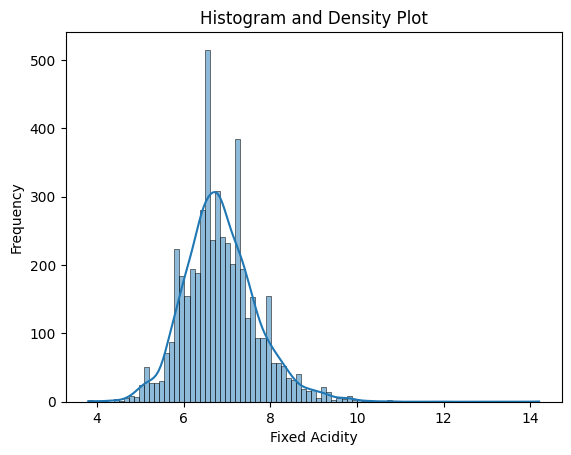

In [59]:
#Normalization:  scaling individual sample to have unit norm ( 0 to 1 or -1 to 1)
'''
Min-Max Scaling: Use when you know the data distribution is not Gaussian 
and when you want to scale the data to a bounded range, such as 0 to 1.

Z-Score Standardization: Use when the data distribution is Gaussian (bell curve) and 
you want to scale the data to have a mean of zero and a standard deviation of one.

Graph the given dataset to find what normalization to use
'''

# Plot histogram and density plot
sns.histplot(data_frame['fixed acidity'], kde=True)
plt.title('Histogram and Density Plot')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

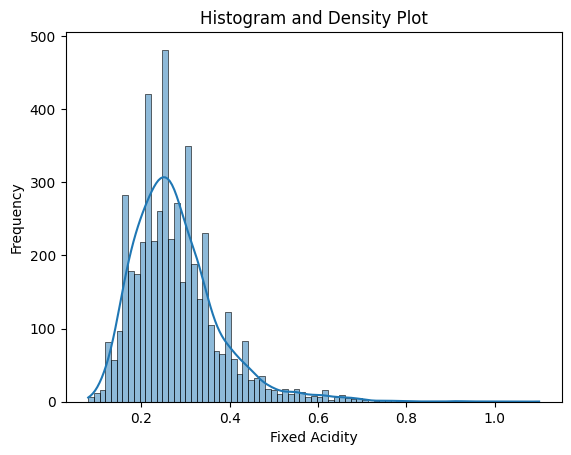

In [60]:
# Plot histogram and density plot
sns.histplot(data_frame['volatile acidity'], kde=True)
plt.title('Histogram and Density Plot')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Notice it is bell curved so we will use Z-score standardization

scaler = StandardScaler()
data_frame_standardized = pd.DataFrame(scaler.fit_transform(data_frame), columns=data_frame.columns)
print(data_frame_standardized.head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.172097         -0.081770     0.213280        2.821349  -0.035355   
1      -0.657501          0.215896     0.048001       -0.944765   0.147747   
2       1.475751          0.017452     0.543838        0.100282   0.193523   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.569932              0.744565  2.331512 -1.246921  -0.349184   
1            -1.253019             -0.149685 -0.009154  0.740029   0.001342   
2            -0.312141             -0.973336  0.358665  0.475102  -0.436816   

    alcohol  quality  
0 -1.393152  0.13787  
1 -0.824276  0.13787  
2 -0.336667  0.13787  



 Number of wine in each quality type of wine

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


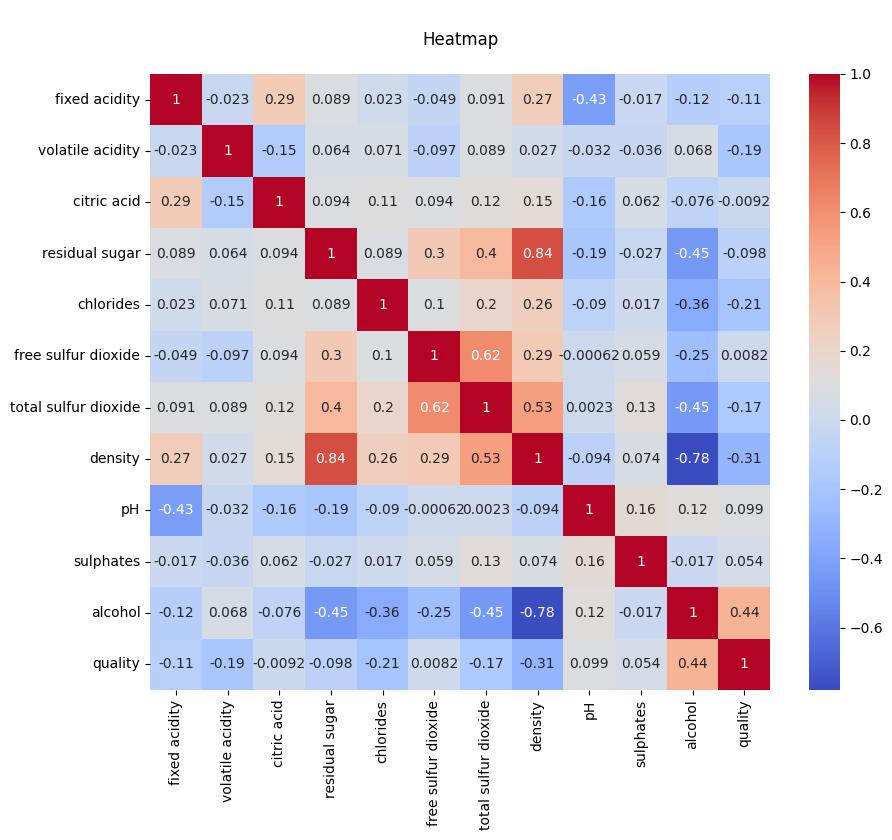

In [62]:
'''
- we notice that wine qualirt vary from 3-9

notice ve have no missing value and all are integers 
so we can move to: find correletion  and build heatmap
'''
print("\n Number of wine in each quality type of wine\n")
print(data_frame['quality'].value_counts())

#calculate correlation matrix
corr_matrix = data_frame_standardized.corr()


#create map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('\nHeatmap\n')
plt.show()

            

In [ ]:
# DECISION TREE

In [63]:
#split data
x = data_frame.drop('quality', axis=1)
y = data_frame['quality']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1) # 70% training and 30% test

In [66]:
#Build decision tree model

decision_tree = DecisionTreeClassifier()
#train
decision_tree = decision_tree.fit(x_train, y_train)

#predict
y_pred = decision_tree.predict(x_test)


In [67]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5775510204081633


In [73]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [ ]:
# Decision tree

In [ ]:
# RANDOM FORESTS

In [71]:
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.673469387755102
